# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
bank.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(style='darkgrid', palette='Set2')

%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

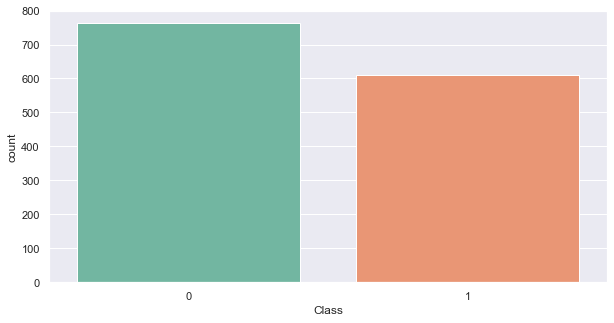

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=bank)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/Users/younique/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/younique/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


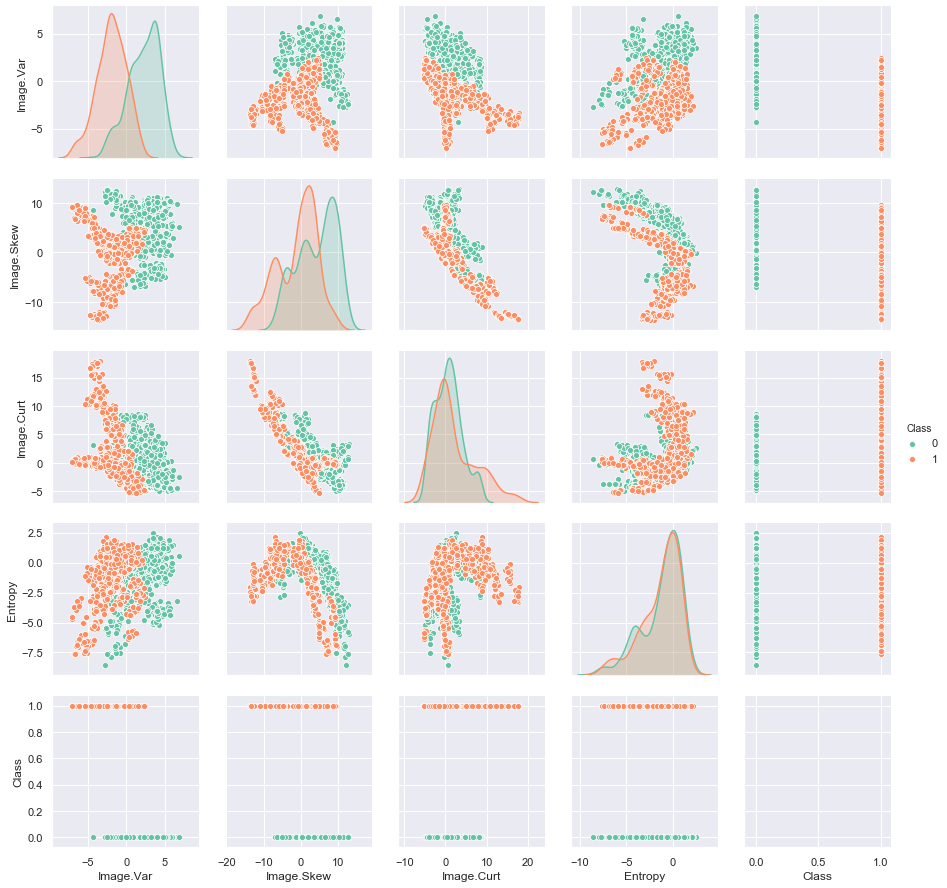

In [6]:
sns.pairplot(data=bank, hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

1) Fit scaler to the features using .fit(data).

   2) Use the .transform(data) method to transform the features to a scaled version.

**NOTE: scaler.fit_transform(data) = scaler.fit.transfrom(data)**

In [9]:
scaled = scaler.fit_transform(bank.drop('Class', axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [10]:
df = pd.DataFrame(scaled)
df.columns = (bank.drop('Class', axis=1)).columns
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Create two objects X and y which are the scaled feature values and labels respectively.**

In [11]:
X = df
y = bank['Class']

**Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=101)

# Tensorflow

In [14]:
import tensorflow as tf

**Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [15]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [16]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

**Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [17]:
classifier = tf.compat.v1.estimator.DNNClassifier(hidden_units = [10, 20, 10], n_classes=2,
                                                                 feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n_/p9rf7qxs523g4gwrbc5j8lbw0000gn/T/tmptgqu6jm3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4bd21d50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big.**

In [18]:
# there is also a pandas_input_fn we'll see in the exercise!!
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=20,
                                                                    num_epochs=5, shuffle=True)

**Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [19]:
classifier.train(input_func, steps=500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [20]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [21]:
note_predictions = list(classifier.predict(input_fn = pred_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/n_/p9rf7qxs523g4gwrbc5j8lbw0000gn/T/tmptgqu6jm3/model.ckpt-240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [22]:
note_predictions[0]

{'logits': array([-12.682364], dtype=float32),
 'logistic': array([3.0994415e-06], dtype=float32),
 'probabilities': array([9.9999690e-01, 3.1054012e-06], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [23]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

**Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
cm = pd.DataFrame(confusion_matrix(y_test, final_preds), columns = ('Class1 ', 'Class 2'),
                                                       index=('1', '2'))

cm.index.names = ['Prediction']
cm

,Class1,Class 2
Prediction,,
1,238,0
2,0,174


In [26]:
print(classification_report(y_test, final_preds)) # Perfect predictions!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Optional Comparison

**You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators = 250)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rfc_yhat = rfc.predict(X_test)

In [31]:
cm = pd.DataFrame(confusion_matrix(y_test, rfc_yhat), columns = ('Class1 ', 'Class 2'),
                                                       index=('1', '2'))

cm.index.names = ['Prediction']
cm

,Class1,Class 2
Prediction,,
1,234,4
2,0,174


In [32]:
print(classification_report(y_test, rfc_yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



**It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN!**

# Great Job!